# Лабораторная работа №5

## Метод сеток решения волнового уравнения.

Рассмотрим смешанную задача для волнового уравнения:

$$
\begin{cases} 
   \frac {d^2u}{dt^2} - \frac {d^2u}{dx^2} = f(x, t), \qquad \qquad \; \; \; \: \ 0 < t \leq T, \ 0 < x < 1,\\
   u(x, 0) = p(x), \ \frac {du}{dt}(x, 0) = q(x), \; \; \: \: \, 0 \leq x \leq 1,\\
   u(0, t) = 0, \ u(1, t) = 0, \qquad \qquad \ 0 \leq t \leq T.
\end{cases}
$$

Следовательно, разностное уравнение можно получить, выразив вторые производные по x и по t через конечные разности:

$$
\frac {d^2u}{dt^2} = \frac{y_k^{v+1} - 2y_k^v + y_k^{v-1}}{\tau^2},
$$

$$
\frac {d^2u}{dx^2} = \frac{y_{k-1}^{v} - 2y_k^v + y_{k+1}^{v}}{h^2}.
$$

### Задача 1.

**Рассчитать колебания u(x,t).**


$$\begin{cases} 
   \frac {d^2u}{dt^2} - \frac {\rho}{E} \cdot \frac {d^2u}{dx^2} = 0, \qquad 0 < x <  L, \\   
   u(0, t) = 0, \ u(L, t) = 0, \;\, 0 \leq t \leq T, \\
   u(x, 0) = - \frac {\rho}{E} \cdot \frac {d^2u}{dx^2}.
\end{cases}$$  

Где E - модуль упругости, $\rho$ - плотность материала стержня.

### Решение:

1. Первый слой: $u_j^0 = p(x_j)$;

2. Для нахождения второго слоя аппроксимируем многочлена Тейлора:

$
u_j^0 + \tau \cdot \dfrac{du}{dt}_j^0 + \dfrac {\tau^2}{2} \cdot \dfrac {d^2u}{dt^2}_j^0 => u_j^1 = \rho_j + \tau \cdot q(x_j) +\dfrac {\tau^2}{2} \cdot  q(x_j)^n
$;

3. Последующие слои находятся по формуле: 

$
u_j^{i+1} = -u_j^{i-1} + \frac {E \cdot \tau^2}{\rho \cdot h^2} \cdot (u_{j+1}^i + u_{j-1}^i) + u_j^i \cdot (2 - 2 \cdot \frac {E \cdot \tau^2}{\rho \cdot h^2})
$.

**Условие устойчивости: $\dfrac {\tau}{h} \cdot \sqrt{\frac {E}{\rho}} \leq 1. $**

**Точность:  $O(h^2 + \tau^2)$.**

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
L = 25
delta_u = 0.2
E = 120e9
rho = 7.4

x_num = 75
x_list = np.linspace(0, L, x_num)
h = L / x_num

T = 1
tau = h / np.sqrt(E/rho)
t_num = int(T / tau)

#p = lambda x: abs(x-L/2)-L/2
#p = lambda x: np.sqrt((L/2)**2-(x-L/2)**2)
#p = lambda x: np.sin(x*np.pi/L)
p = lambda x: 0.04*x**2 - x
f = lambda x: 0
q = lambda x: 0

In [36]:
def solve_1():
    M = np.zeros((t_num, x_num), dtype=np.float)
    M[0, 1:-1] = p(x_list[1:-1])
    M[1, 1:-1] = p(x_list[1:-1]) + tau * q(x_list[1:-1]) + tau**2 / 2 * (f(x_list[1:-1]) + p(x_list[2:]) - 2 * p(x_list[1:-1]) + p(x_list[:-2]))

    expr = E/rho * tau**2 / h**2
    for i in range(2, t_num):
        M[i, 1:-1] = -M[i-2, 1:-1] + expr * (M[i-1, 2:] + M[i-1, :-2]) + M[i-1, 1:-1] * (2 - 2*expr)
    return M


def draw_plot(M):
    for M_x in [M[:][i] for i in range(x_num)]:
        plt.plot(x_list, M_x)
    plt.grid()
    plt.show()

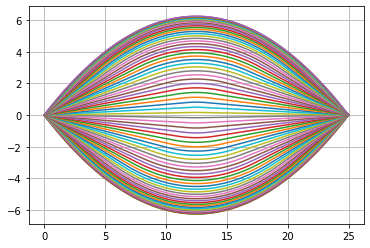

In [37]:
M = solve_1()
draw_plot(M)

### Задача 2.

**Рассчитать колебания тонкой пластины.**

$$
\frac {d^2u}{dt^2} - (\frac {d^2u} {dx^2} + \frac {d^2u}{dy^2}) = 0,
$$

где u(x, y, t) - деформация пластины, x, y - координаты, t - время.

### Решение:

Выразим производные через конечные разности:

$\frac {d^2u}{dt^2} = \frac {u_{j, i}^{k+1} - 2 \cdot u_{j, i}^k + u_{j, i}^{k-1}}{\tau^2}$,

$\frac {d^2u}{dx^2} = \frac {u_{i+1, j}^{k} - 2 \cdot u_{i, j}^k + u_{i-1, j}^k}{h^2}$,

$\frac {d^2u}{dy^2} = \frac {u_{i, j+1}^{k} - 2 \cdot u_{i, j}^k + u_{i, j-1}^k}{h_y^2}$.  

Формула для вычисления относительно $u_{i,j}^{k+1}$:

$u_{j, i}^{k+1} = 2 \cdot u_{j, i}^{k} \cdot (1 - \frac{\tau^2}{h^2} - \frac{\tau^2}{h_y^2}) + (u_{j+1,i}^{k} + u_{j-1,i}^{k}) \cdot \frac{\tau^2}{h_y^2} + (u_{j,i+1}^{k} + u_{j, i-1}^{k}) \cdot \frac{\tau^2}{h^2} - u_{j, i}^{k-1}$  


Аппроксимация граничных условий:

$\frac {\partial u}{\partial n} = 0 => u_{0, j}^k = u_{1, j}^k, \ u_{N_y, j}^k = u_{N_y-1, j}^k$ 

Второй временной слой аппроксимируем многочленом Тейлора:  

$u^1 = u^0 + \tau \cdot \frac {du}{dt} + \frac {\tau^2}{2} \cdot \dfrac {d^2u_{i,j}^0}{dt^2} = p_{i,j} + \tau \cdot q_{i,j} + \frac {\tau^2}{2} \cdot \dfrac {d^2u_{i,j}^0}{dt^2} = p_{i,j} + \tau \cdot q_{i,j} + \frac {\tau^2}{2} \cdot (\frac {d^2u}{dx^2} + \frac {d^2u}{dy^2}) =  p_{i,j} + \tau \cdot q_{i,j} + \frac {\tau^2}{2}\cdot (\dfrac{p_{i+1,j} - 2\cdot p_{i,j} + p_{i-1,j}}{h^2} + \dfrac{p_{i,j+1} - 2\cdot p_{i,j} + p_{i,j-1}}{h_y^2})$

**Условие устойчивости: $\tau \leq \frac{h \cdot h_y}{\sqrt{h^2 + h_y^2}}.$**

**Точность:  $O(h^2 + \tau^2 + h_y^2)$.**

In [40]:
a = 3
b = 1

x_num = 40
x_h = a / x_num
x_list = np.linspace(-a / 2, a / 2, x_num)

y_num = 40
y_h = b / y_num
y_list = np.linspace(-b / 2, b / 2, y_num)

T = 10
tau = x_h * y_h / np.sqrt(x_h ** 2 + y_h ** 2)
t_num = int(T / tau)

u_0 = lambda x, y: 2 * np.cos(np.pi * x / a)
du_dt_0 = lambda x, y: np.tan(np.sin(2*np.pi * x / a)) * np.sin(np.pi * y / b)

In [41]:
def solve_2():
    M = np.zeros((x_num, y_num, t_num))
    u_0_matrix = np.zeros((x_num, y_num))
    du_dt_0_matrix = np.zeros((x_num, y_num))

    for i in range(x_num):
        for j in range(y_num):
            u_0_matrix[i, j] = u_0(x_list[i], y_list[j])
            du_dt_0_matrix[i, j] = du_dt_0(x_list[i], y_list[j])

    M[1:-1, :, 0] = u_0_matrix[1:-1]

    for i in range(1, x_num - 1):
        for j in range(1, y_num - 1):
            M[i, j, 1] = u_0_matrix[i, j] + tau * du_dt_0_matrix[i, j] + tau ** 2 / 2 * \
                         ((u_0_matrix[i + 1, j] - 2 * u_0_matrix[i, j] + u_0_matrix[i - 1, j]) / x_h ** 2 +
                          (u_0_matrix[i, j + 1] - 2 * u_0_matrix[i, j] + u_0_matrix[i, j - 1]) / y_h ** 2)

    M[1:x_num-1, 0, 1] = M[1:x_num-1, 1, 1]
    M[1:x_num-1, -1, 1] = M[1:x_num-1, -2, 1]

    for k in range(2, t_num):
        for i in range(1, x_num - 1):
            for j in range(1, y_num - 1):
                M[i, j, k] = 2 * M[i, j, k - 1] * (1 - (tau / x_h) ** 2 - (tau / y_h) ** 2) + \
                             (M[i, j + 1, k - 1] + M[i, j - 1, k - 1]) * (tau / y_h) ** 2 + \
                             (tau / x_h) ** 2 * (M[i + 1, j, k - 1] + M[i - 1, j, k - 1]) - M[i, j, k-2]
            M[i, 0, k] = M[i, 1, k]
            M[i, -1, k] = M[i, -2, k]

    return M

In [47]:
def x_plot(M, x, t_h):
    for u_x in M[x, :, ::t_h].transpose():
        plt.plot(x_list, u_x)
    plt.title("Проекция x")
    plt.xlabel('x')
    plt.ylabel('u')
    plt.grid()
    plt.show()


def y_plot(M, y, t_h):
    for u_x in M[:, y, ::t_h].transpose():
        plt.plot(y_list, u_x)
    plt.title("Проекция y")
    plt.xlabel('y')
    plt.ylabel('u')
    plt.grid()
    plt.show()

In [43]:
M = solve_2()

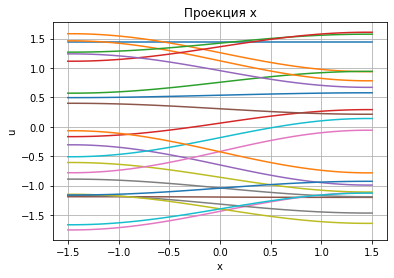

In [52]:
x_plot(M, 10, 20)

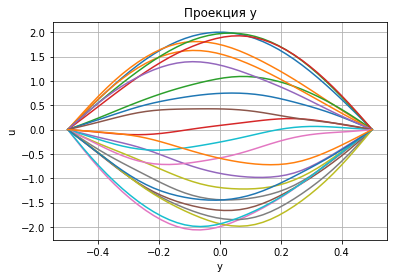

In [53]:
y_plot(M, 10, 20)